In [1]:
import numpy as np
import pylab as plt
import matplotlib
import pickle as pickle

In [2]:
f = open("time_freq_individual.pkl","rb")
mydict = pickle.load(f,encoding='latin1')
f.close()
freq_valuesEven,time_valuesEven,freq_valuesOdd,time_valuesOdd,freq,soIX = mydict

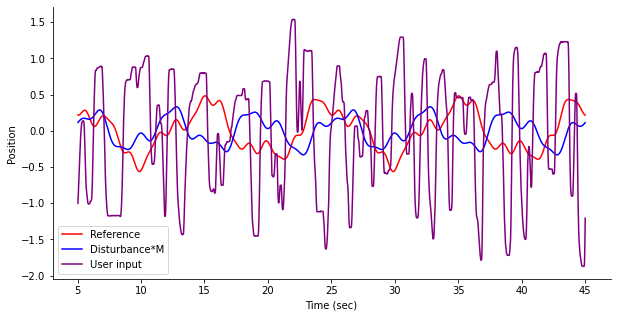

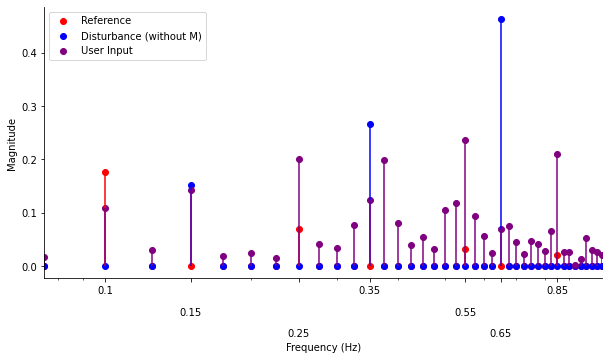

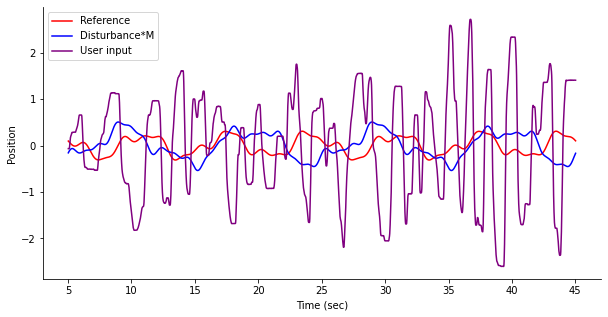

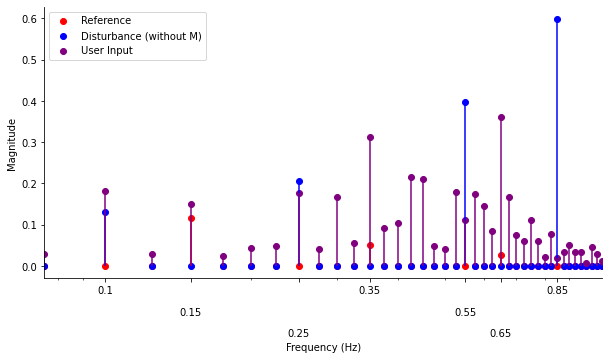

In [3]:
# plot time-domain data
def plot_timedata(timedomaindata):
    plt.figure(figsize=(10,5))
    ax = plt.subplot(111)
    plt.plot(timedomaindata['times'],timedomaindata['refs'],color='r',label='Reference')
    plt.plot(timedomaindata['times'],(timedomaindata['dists']),color='blue',label='Disturbance*M')
    plt.plot(timedomaindata['times'],timedomaindata['inps'],color='purple',label='User input')
    plt.xlabel('Time (sec)')
    plt.ylabel('Position')
    ax.spines['right'].set_visible(False)
    ax.spines['top'].set_visible(False)
    plt.legend()
    plt.show()
    
def plot_freqdata(freqdata):
    plt.figure(figsize=(10,5))
    ax = plt.subplot(111)

    plt.scatter(freq/20.0,abs(freqdata['REFS']),color='r',label='Reference')
    plt.scatter(freq/20.0,abs(freqdata['DISTSnoM']),color='blue',label='Disturbance (without M)')
    plt.vlines(freq/20.0,np.zeros((len(freq),)),abs(freqdata['REFS']),color='r')
    plt.vlines(freq/20.0,np.zeros((len(freq),)),abs(freqdata['DISTSnoM']),color='blue')
    plt.scatter(freq/20.0,abs(freqdata['INPS']),color='purple',label='User Input')
    plt.vlines(freq/20.0,np.zeros((len(freq),)),abs(freqdata['INPS']),color='purple')

    plt.ylabel('Magnitude')
    ax.set_xscale("log", nonposx='clip')
    #ax.set_yscale("log", nonposy='clip')

    ax.set_xticks(soIX/2.0/20)
    labels = ax.set_xticklabels((soIX/2.0/20))
    for i, label in enumerate(labels):
        label.set_y(label.get_position()[1] - (i % 3) * 0.08)
    plt.xlabel('Frequency (Hz)')
    ax.spines['right'].set_visible(False)
    ax.spines['top'].set_visible(False)
    plt.legend()
    plt.xlim((1.5/20,21.0/20))
    plt.show()

# plot even data
plot_timedata(time_valuesEven)
plot_freqdata(freq_valuesEven)

# plot odd data
plot_timedata(time_valuesOdd)
plot_freqdata(freq_valuesOdd)